# CSCN8010-S25-Sec1 Lab #1
Erica Holden, 5490685

## 1. Framing the Problem

In this notebook, we will be loading the California Housing Prices Dataset from Kaggle and performing linear regressions showing the median house value against 3 different variables
1. Median income
2. Population
3. Number of households

In [1]:
%pip install --upgrade numpy pandas matplotlib scikit-learn seaborn tabulate

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches
from tabulate import tabulate
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, mean_absolute_error

## 2. and 3.1 Reading and describing the data

In [3]:
df = pd.read_csv('./data/housing.csv')
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


## 3.2 Exploratory Data Analysis

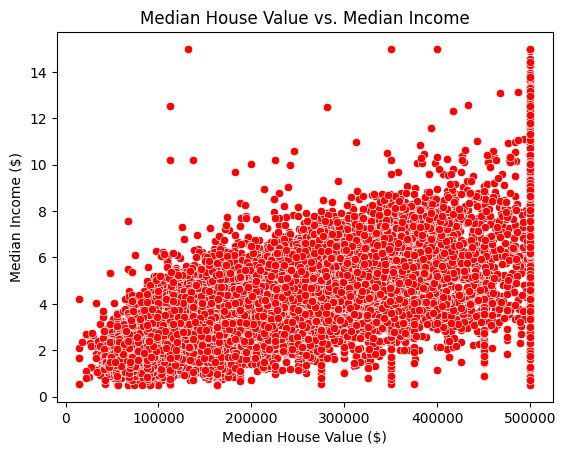

In [4]:
# 3.2a Plot median house value vs. median income
sns.scatterplot(data=df, x='median_house_value', y='median_income', color='red')
plt.title('Median House Value vs. Median Income')
plt.xlabel('Median House Value ($)')
plt.ylabel('Median Income ($)')
plt.show()

### 3.2a Observations

Looking at the scatterplot, it appears that median house value increases as median income increases. This appears to be a strong correlation. There is some noise or limit around the 500,000 mark for median house value. I would think population and number of households have less impact on the median house value. 

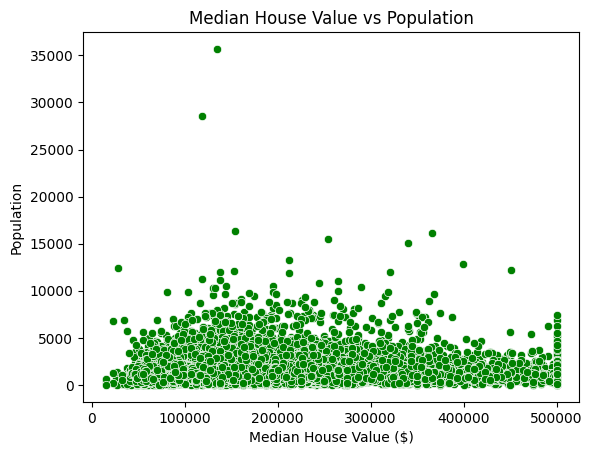

In [5]:
# 3.2b Plot median house value vs. population
sns.scatterplot(data=df, x='median_house_value', y='population', color='green')
plt.title('Median House Value vs Population')
plt.xlabel('Median House Value ($)')
plt.ylabel('Population')
plt.show()

### 3.2b Observations

The median house value appears pretty evenly distributed across the populations, with some population outliers that might be skewing the data. Again the limit seems to be at 500,000 for the median house value, as the population samples appear in a vertical line there. I would've suspected population might affect median house value more than number of households.

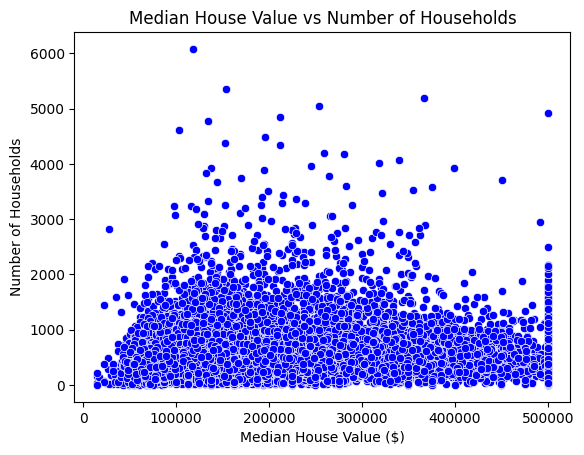

In [6]:
# 3.2c Plot median house value vs. number of households
sns.scatterplot(data=df, x='median_house_value', y='households', color='blue')
plt.title('Median House Value vs Number of Households')
plt.xlabel('Median House Value ($)')
plt.ylabel('Number of Households')
plt.show()

### 3.2c Observations

In this plot we see that median house values of approximately 125,000 to 150,000 are largely found around 1,500 to 2,000 number of households. There are many outliers in this scatterplot. The basic shape of the scatterplot is similar however, which isn't surprising as population and number of households are related.

## 3.3 Description of the 4 variables used in this lab

The source of the dataset can be found on kaggle at https://www.kaggle.com/datasets/camnugent/california-housing-prices and some description of the variables is given. The population is the number of people in an area, where the number of households will be smaller but related since there are some number of people in a household (so for my household, the population would be 3 but the number of households would be only 1). Median income is the income measured in 10's of thousands of dollars. The median house value must be somewhat old data, since houses have come up a lot in value since this set. 

# 4 Run 3 linear regressions

In [7]:

model_median_income = linear_model.LinearRegression()
model_median_income.fit(X=df[['median_house_value']], y=df['median_income'])

model_population = linear_model.LinearRegression()
model_population.fit(X=df[['median_house_value']], y=df['population'])

model_households = linear_model.LinearRegression()
model_households.fit(X=df[['median_house_value']], y=df['households'])

LinearRegression()

# 5 Tabulate results showing slope and intercept, mean squared error (MSE), and mean absolute error (MAE)

In [8]:
results_of_models = [
    [
        'Median House Value vs. Median Income',
        str(model_median_income.intercept_) + ", " + str(model_median_income.coef_[0]),
        mean_squared_error(df['median_income'], model_median_income.predict(df[['median_house_value']])),
        mean_absolute_error(df['median_income'], model_median_income.predict(df[['median_house_value']]))
    ],
    [
        'Median House Value vs. Population',
        str(model_population.intercept_) + ", " + str(model_population.coef_[0]),
        mean_squared_error(df['population'], model_population.predict(df[['median_house_value']])),
        mean_absolute_error(df['population'], model_population.predict(df[['median_house_value']]))
    ],
    [
        'Median House Value vs. Number of Households',
        str(model_households.intercept_) + ", " + str(model_households.coef_[0]),
        mean_squared_error(df['households'], model_households.predict(df[['median_house_value']])),
        mean_absolute_error(df['households'], model_households.predict(df[['median_house_value']]))
    ]
]

headers = ['Title','Intercept and Slope', 'Mean Squared Error', 'Mean Absolute Error']
print(tabulate(results_of_models, headers=headers, tablefmt="github"))


| Title                                       | Intercept and Slope                        |   Mean Squared Error |   Mean Absolute Error |
|---------------------------------------------|--------------------------------------------|----------------------|-----------------------|
| Median House Value vs. Median Income        | 1.5273748109684906, 1.1328161938855772e-05 |          1.90041     |                1.0104 |
| Median House Value vs. Population           | 1475.516292350543, -0.00024190544366722044 |          1.28163e+06 |              713.659  |
| Median House Value vs. Number of Households | 454.4139928628061, 0.00021815043949004488  |     145535           |              246.381  |


# 6 Plot the resulting line, with intercept and slope, MSE, and MAE

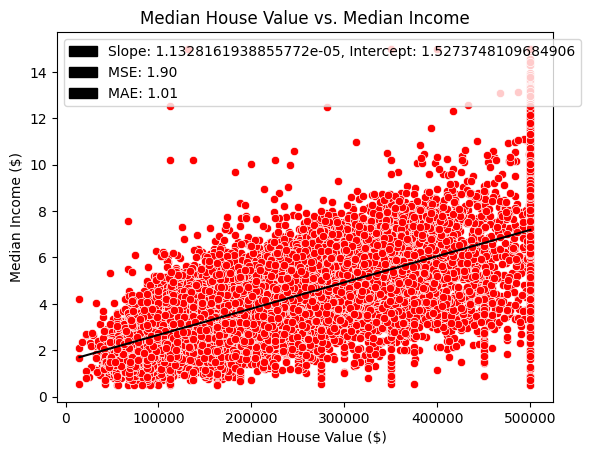

In [9]:
# 6a Plot median house value vs. median income
sns.scatterplot(data=df, x='median_house_value', y='median_income', color='red')
plt.title('Median House Value vs. Median Income')
plt.xlabel('Median House Value ($)')
plt.ylabel('Median Income ($)')

slope = model_median_income.coef_[0]
intercept = model_median_income.intercept_

x_line = np.linspace(df['median_house_value'].min(), df['median_house_value'].max(), 100)
y_line = slope * x_line + intercept

plt.plot(x_line, y_line, color='black')
patch1 = mpatches.Patch(color='black', label = f'Slope: {slope}, Intercept: {intercept}')
patch2 = mpatches.Patch(color='black', label = f'MSE: {mean_squared_error(df["median_income"], model_median_income.predict(df[["median_house_value"]])):.2f}')
patch3 = mpatches.Patch(color='black', label = f'MAE: {mean_absolute_error(df["median_income"], model_median_income.predict(df[["median_house_value"]])):.2f}')
plt.legend(handles=[patch1, patch2, patch3], loc='upper left')
plt.show()

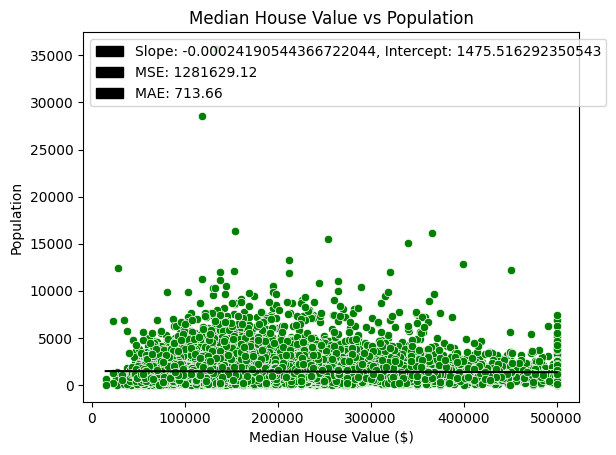

In [10]:
# 6b Plot median house value vs. population
sns.scatterplot(data=df, x='median_house_value', y='population', color='green')
plt.title('Median House Value vs Population')
plt.xlabel('Median House Value ($)')
plt.ylabel('Population')

slope = model_population.coef_[0]
intercept = model_population.intercept_

x_line = np.linspace(df['median_house_value'].min(), df['median_house_value'].max(), 100)
y_line = slope * x_line + intercept

plt.plot(x_line, y_line, color='black')
patch1 = mpatches.Patch(color='black', label = f'Slope: {slope}, Intercept: {intercept}')
patch2 = mpatches.Patch(color='black', label = f'MSE: {mean_squared_error(df["population"], model_population.predict(df[["median_house_value"]])):.2f}')
patch3 = mpatches.Patch(color='black', label = f'MAE: {mean_absolute_error(df["population"], model_population.predict(df[["median_house_value"]])):.2f}')
plt.legend(handles=[patch1, patch2, patch3], loc='upper left')
plt.show()

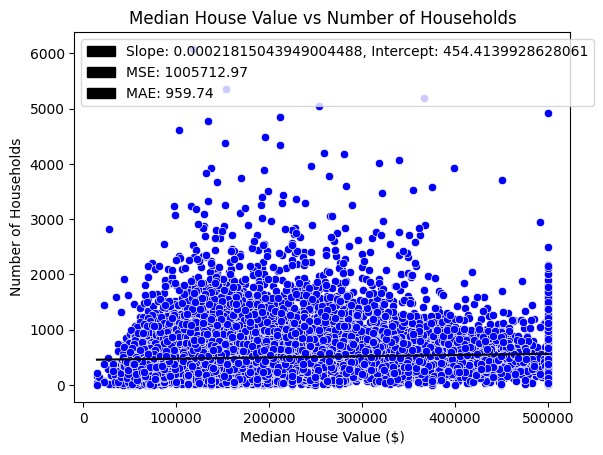

In [11]:
# 6c Plot median house value vs. number of households
sns.scatterplot(data=df, x='median_house_value', y='households', color='blue')
plt.title('Median House Value vs Number of Households')
plt.xlabel('Median House Value ($)')
plt.ylabel('Number of Households')

slope = model_households.coef_[0]
intercept = model_households.intercept_

x_line = np.linspace(df['median_house_value'].min(), df['median_house_value'].max(), 100)
y_line = slope * x_line + intercept

plt.plot(x_line, y_line, color='black')
patch1 = mpatches.Patch(color='black', label = f'Slope: {slope}, Intercept: {intercept}')
patch2 = mpatches.Patch(color='black', label = f'MSE: {mean_squared_error(df["households"], model_population.predict(df[["median_house_value"]])):.2f}')
patch3 = mpatches.Patch(color='black', label = f'MAE: {mean_absolute_error(df["households"], model_population.predict(df[["median_house_value"]])):.2f}')
plt.legend(handles=[patch1, patch2, patch3], loc='upper left')
plt.show()

# 7 Conclusion

The slope for median house value vs population and vs number of households was quite similar, though the former slopes slightly down and the latter slopes slightly up. Both of these two were almost straight lines however, which suggests to me there was little correlation. However, the MSE and MAE for each of these were quite high too, suggesting it's hard to find the best line of fit for these values. The MSE and MAE were lowest for median house value vs median income, suggesting this was the best model to use to predict house value. The diagonal line was very pronounced as well, which suggests to me there is a strong relationship between the two features. 